In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
from options_freedom.symbol.vix import vix

In [2]:
# open methods
dir_path = os.getcwd()
def gen_results_path(filename: str):
    return os.path.join(dir_path, "data/bull_put_spread", filename)

In [3]:
filename = "BullPutSpread_30_15_45_20_100_50_ligth"

In [4]:
with open(gen_results_path(filename), "rb") as f:
    trades = pickle.load(f)
len(trades)

112

In [5]:
dates = list(trades.keys())
profits = [t['profit_loss'] for t in trades.values()]
p_l_cumm = np.cumsum(profits)

### Plotting

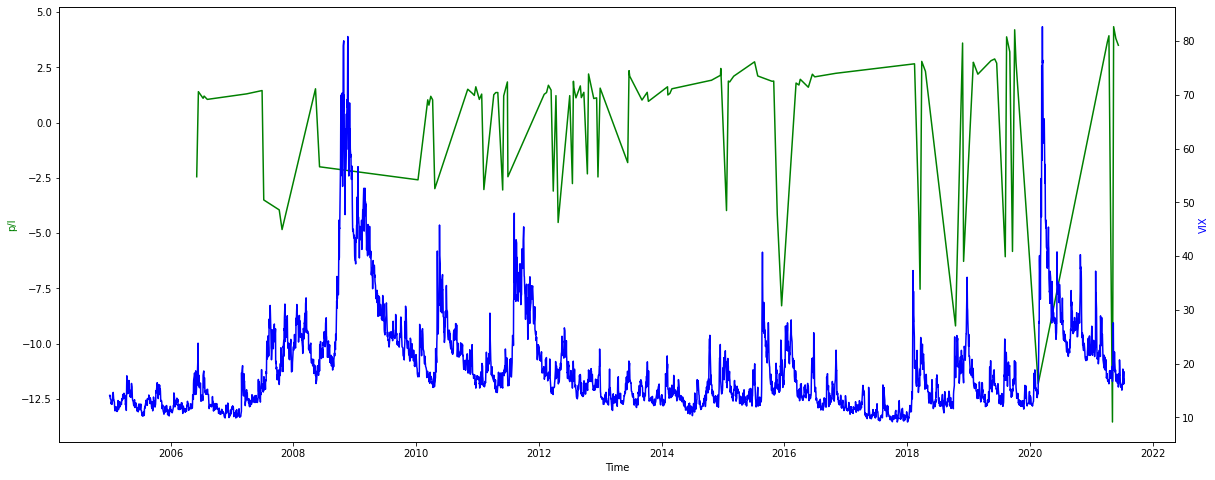

In [6]:
fig, ax1 = plt.subplots(figsize=(20,8))

ax2 = ax1.twinx()
ax1.plot(dates, profits, 'g-')
ax2.plot(vix._df['time_stamp'], vix._df['bid'], 'b-')

ax1.set_xlabel('Time')
ax1.set_ylabel('p/l', color='g')
ax2.set_ylabel('VIX', color='b')

plt.show()

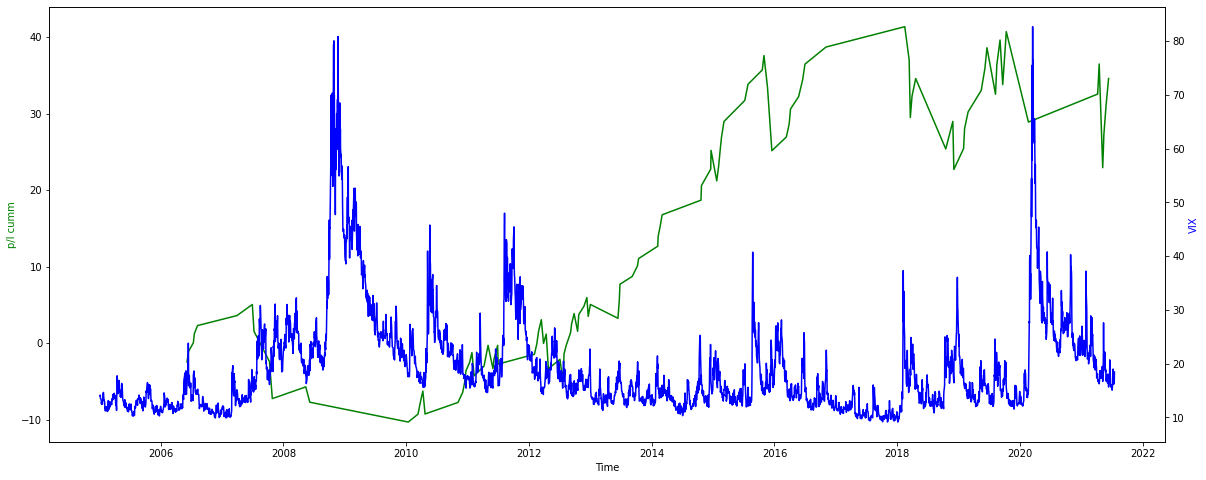

In [7]:
fig, ax1 = plt.subplots(figsize=(20,8))

ax2 = ax1.twinx()
ax1.plot(dates, p_l_cumm, 'g-')
ax2.plot(vix._df['time_stamp'], vix._df['bid'], 'b-')

ax1.set_xlabel('Time')
ax1.set_ylabel('p/l cumm', color='g')
ax2.set_ylabel('VIX', color='b')

plt.show()

In [8]:
total_p_l = sum([x for x in profits if x is not None])
print(f'Total P/L: {total_p_l}')

Total P/L: 34.56999999999999


In [9]:
average = total_p_l / len(profits)
print(f'Average profit: {average}')

Average profit: 0.30866071428571423


In [10]:
average_max_loss = sum([t['max_loss'] for t in trades.values()]) / len(list(trades.values()))
print(f"Average max loss: {average_max_loss}")

Average max loss: 8.60249999999998


In [11]:
average_max_profit = sum([t['max_profit'] for t in trades.values()]) / len(list(trades.values()))
print(f"Average max profit: {average_max_profit}")

Average max profit: 3.3488392857142864


In [13]:
anualized_return = (total_p_l/average_max_loss)**(1/(2021-2006))
print(f"Anualized return: {anualized_return}")

Anualized return: 1.0971642460547972
